In [477]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [478]:
df = pd.read_csv("survey_results_public.csv")

In [479]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [480]:
len(df.values)

73268

In [481]:
df["Country"].value_counts(dropna=False).head(20)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
NaN                                                      1497
Australia                                                1462
Russian Federation                                       1229
Sweden                                                   1020
Turkey                                                   1020
Switzerl

In [482]:
df = df[~df["Country"].isna()] # remove NaN
df = df[~df["RemoteWork"].isna()]

In [483]:
len(df.values)

58958

In [484]:
df["RemoteWork"].value_counts()

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: RemoteWork, dtype: int64

In [485]:
def count_remote(row):
    print(row)
    return row.value_counts["Fully remote"]

In [486]:
remote_s = df.groupby("Country")["RemoteWork"].value_counts()

In [487]:
remote_s

Country      RemoteWork                          
Afghanistan  Hybrid (some remote, some in-person)    17
             Fully remote                            15
             Full in-person                          14
Albania      Full in-person                          19
             Hybrid (some remote, some in-person)    13
                                                     ..
Zambia       Hybrid (some remote, some in-person)     4
             Fully remote                             3
Zimbabwe     Hybrid (some remote, some in-person)     8
             Full in-person                           5
             Fully remote                             5
Name: RemoteWork, Length: 474, dtype: int64

In [488]:
remote_df = remote_s.to_frame("RemoteWork")

In [489]:
remote_df.rename(columns={"RemoteWork": "Count"}, inplace=True)

In [490]:
remote_df.reset_index(inplace=True)

In [491]:
remote_df = remote_df.pivot_table(index="Country", columns=["RemoteWork"], values=["Count"])

In [492]:
remote_df.dropna(inplace=True)

In [493]:
remote_df

Count               \
RemoteWork                           Full in-person Fully remote   
Country                                                            
Afghanistan                                    14.0         15.0   
Albania                                        19.0         11.0   
Algeria                                         7.0          7.0   
Argentina                                      28.0        293.0   
Armenia                                        28.0         32.0   
...                                             ...          ...   
Venezuela, Bolivarian Republic of...            5.0         72.0   
Viet Nam                                      111.0         34.0   
Yemen                                           4.0          4.0   
Zambia                                          4.0          3.0   
Zimbabwe                                        5.0          5.0   

                                                                           
RemoteWork                           Hybrid (some remote, some in-person)  
Country                                                                    
Afghanistan                                                          17.0  
Albania                                                              13.0  
Algeria                                                               8.0  
Argentina                                                           129.0  
Armenia                                                              29.0  
...                                                                   ...  
Venezuela, Bolivarian Republic of...                                 22.0  
Viet Nam                                                             70.0  
Yemen                                                                 5.0  
Zambia                                                                4.0  
Zimbabwe                                                              8.0  

[139 rows x 3 columns]

In [494]:
remote_df.columns = remote_df.columns.droplevel() # remove the count level

In [495]:
columns = ["Full in-person", "Fully remote", "Hybrid (some remote, some in-person)"]
remote_df["Sum"] = remote_df["Full in-person"] + remote_df["Fully remote"] + remote_df["Hybrid (some remote, some in-person)"]
for column in columns:
    remote_df[column] /= remote_df["Sum"]

In [496]:
remote_df = remote_df.sort_values(["Sum"], ascending=[False])[:20].reset_index() # take 20 most popular countries

In [497]:
remote_df["Country"].replace({"United Kingdom of Great Britain and Northern Ireland": "Great Britain"}, inplace=True)

<Figure size 1200x1200 with 0 Axes>

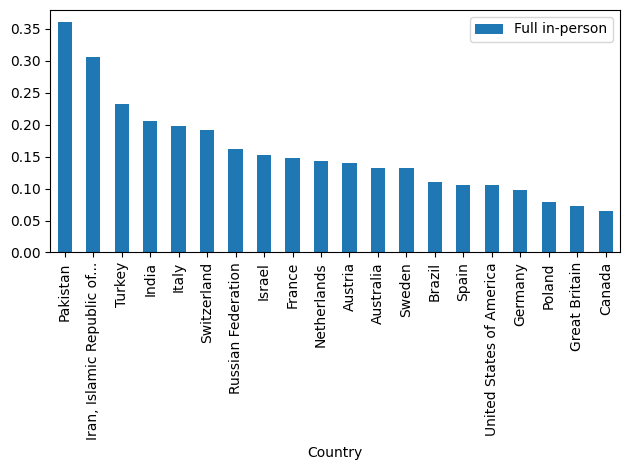

<Figure size 1200x1200 with 0 Axes>

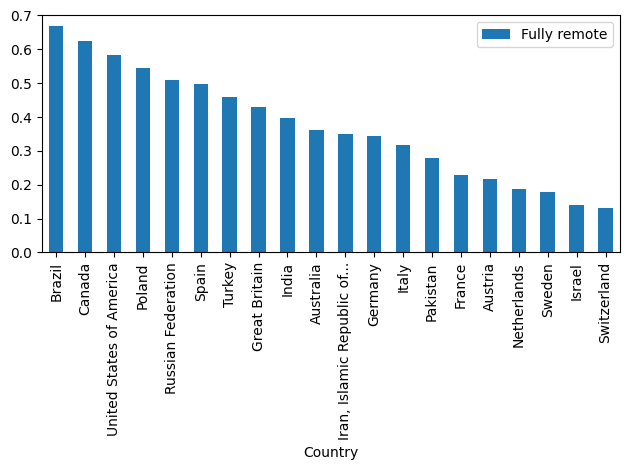

<Figure size 1200x1200 with 0 Axes>

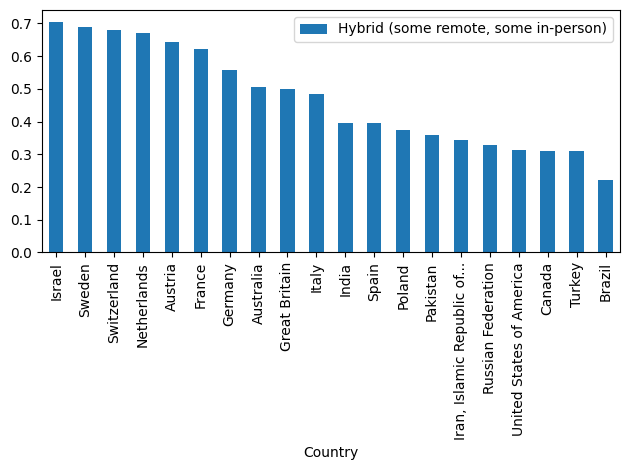

In [498]:
for col in columns:
    plt.figure(figsize=(12, 12))
    remote_df.sort_values(by=[col], ascending=[False]).plot.bar(x="Country", y=col)
    plt.savefig(f"./graphs/remote_per_country/{col}.png")